<a href="https://colab.research.google.com/github/PGM-Lab/2023-RateFunction/blob/main/Synthetic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [494 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,251 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [915 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,015 kB]
Get

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from tqdm import tqdm
import copy
from google.colab import files
import pickle

# Set-Up



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.pyplot import figure
import scipy as sp

import matplotlib as mpl

In [5]:


def non_latex_format():
    mpl.rcParams.update(mpl.rcParamsDefault)

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    plt.rcParams['figure.figsize'] = (16, 7)
    fontsize = 30
    matplotlib.rcParams.update({'font.size': fontsize})

def latex_format():
  plt.rcParams.update({
      'font.size': 10,
      'text.usetex': True,
      'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{bm}'
  })
  mpl.rc('font',family='Times New Roman')
  matplotlib.rcParams['pdf.fonttype'] = 42
  matplotlib.rcParams['ps.fonttype'] = 42
  plt.rcParams['figure.figsize'] = (16, 9)
  fontsize = 30
  matplotlib.rcParams.update({'font.size': fontsize})




In [6]:
latex_format()

# Data

In [73]:
x = np.linspace(0, 0.5, 100)

In [74]:
model1 = lambda x: (x**2)/2
model2 = lambda x: (x**2)/1
model3 = lambda x: (x**2)/3

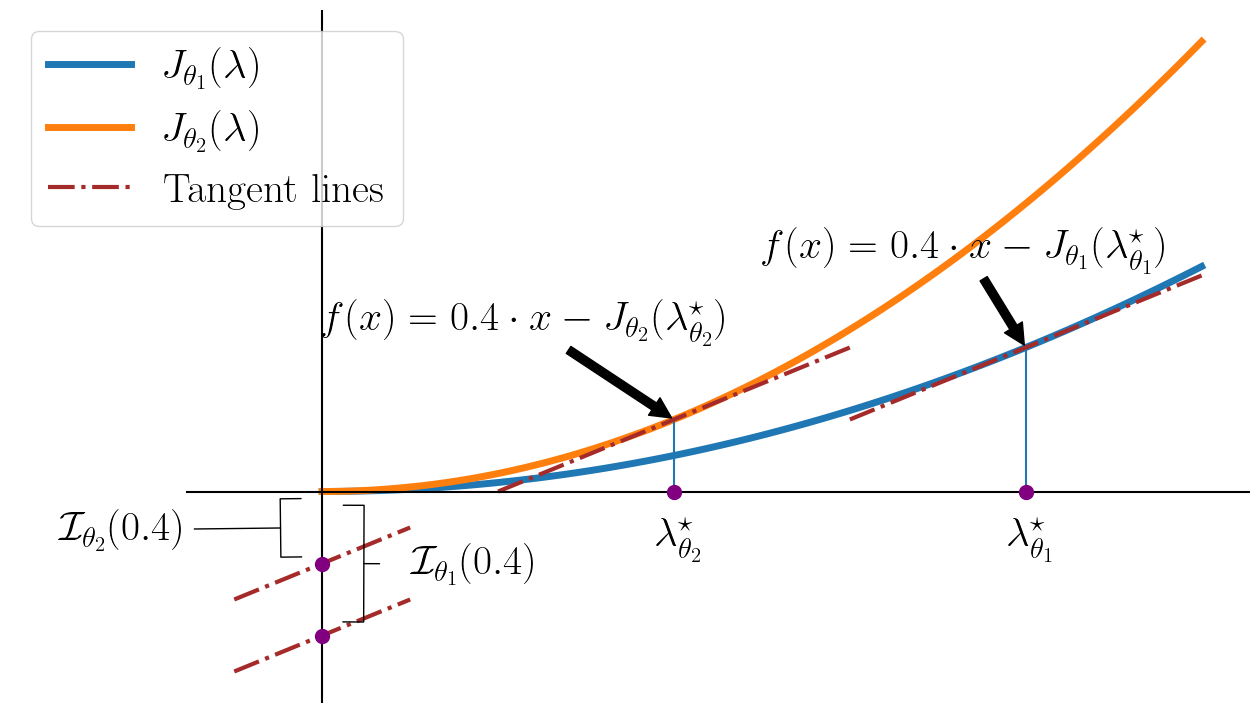

In [9]:
plt.plot(x, model1(x), linewidth = 5, label = r"$J_{\theta_1}(\lambda)$")
plt.plot(x, model2(x), linewidth = 5, label = r"$J_{\theta_2}(\lambda)$")




slope = 0.4
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.vlines(lambd, 0, model2(lambd))
plt.annotate(xy = (lambd, model2(lambd)),
             xytext = (lambd - 0.2,  model2(lambd) + 0.05),
             text = r"$f(x) = 0.4 \cdot x - J_{\theta_2}(\lambda_{\theta_2}^\star)$",
             arrowprops=dict(arrowstyle = "simple", facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(lambd, 0, s=100, color = "purple", zorder = 3)
plt.text(lambd-0.01, -0.03, r"$\lambda_{\theta_2}^\star$")
plt.plot(x_, slope * x_ - model2(slope/2), "-.", color = "brown", linewidth=3, label = r"Tangent lines")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)
plt.plot(x_, slope * x_ - model2(slope/2), "-.", color = "brown", linewidth=3)
plt.scatter(0, - model2(slope/2), s = 100, color = "purple", zorder = 3)
# plt.annotate(xy = (0, - model2(slope/2)),
#              xytext = (0.1, - model2(slope/2)),
#              text = r"$\mathcal{I}(\theta_2, 0.4)$",
#              arrowprops=dict(arrowstyle = "simple", facecolor='black', shrinkA = 20, shrinkB=20, relpos = (0.5, 0.5)))

plt.annotate(r"$\mathcal{I}_{\theta_2}(0.4)$", xy = (0, - model1(slope/2)/2 - 0.01 ) , xytext = (-0.15, - model1(slope/2)/2- 0.01 - 0.007),
            arrowprops=dict(arrowstyle='-[, widthB=00.7, lengthB=.5', shrinkA = 5,shrinkB = 30, lw=1.0))


pos = slope
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)
plt.vlines(lambd, 0, model1(lambd))

plt.annotate(xy = (lambd, model1(lambd)),
             xytext = (lambd - 0.15,  model1(lambd) + 0.05),
             text = r"$f(x) = 0.4 \cdot x - J_{\theta_1}(\lambda_{\theta_1}^\star)$",
             arrowprops=dict(arrowstyle = "simple", facecolor='black', relpos = (0.5, 0.5)))

plt.scatter(lambd, 0, s = 100, color = "purple", zorder = 3)
plt.text(lambd-0.01, -0.03, r"$\lambda_{\theta_1}^\star$")

plt.plot(x_, slope * x_ - model1(slope), "-.", color = "brown", linewidth=3)
x_ = np.linspace(slope-0.1, slope+0.1, 10)
plt.plot(x_, slope * x_ - model1(slope), "-.", color = "brown", linewidth=3)
plt.scatter(0, - model1(slope), s = 100, color = "purple", zorder = 3)
# plt.annotate(xy = (0, - model1(slope)),
#              xytext = (0.1, - model1(slope)),
#              text = r"$\mathcal{I}(\theta_1, 0.4)$",
#              arrowprops=dict(arrowstyle = "simple", facecolor='black', shrinkA = 20, shrinkB=20, relpos = (0.5, 0.5)))

plt.annotate(r"$\mathcal{I}_{\theta_1}(0.4)$", xy = (0, - model1(slope)/2), xytext = (0.05, - model1(slope)/2 - 0.006),
            arrowprops=dict(arrowstyle='-[, widthB=01.4, lengthB=.5', shrinkA = 20,shrinkB = 30, lw=1.0))


ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()


plt.vlines(0, ylim[0], ylim[1], color = "black")
plt.hlines(0, xlim[0], xlim[1], color = "black")

plt.legend()
ax.set_xlim([xlim[0]-0.1, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
plt.axis("off")
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')
#plt.show()


0.525
0.2645


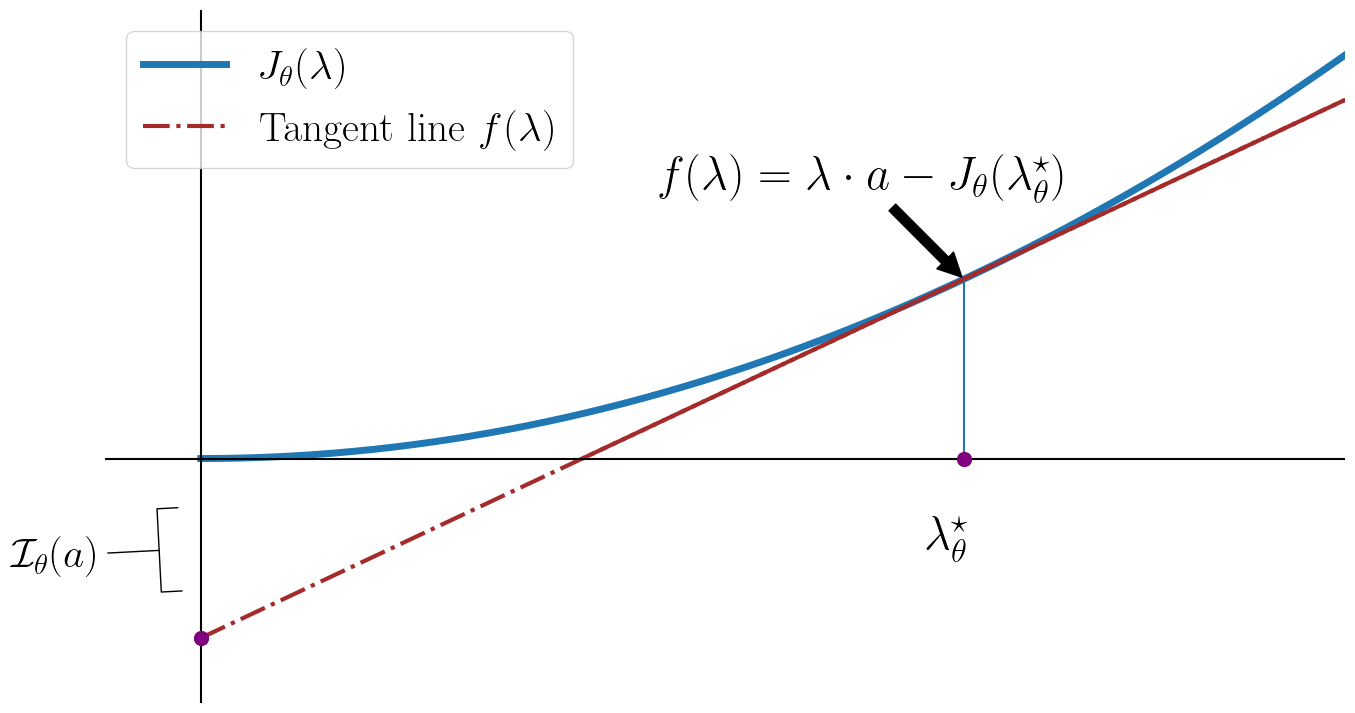

In [10]:
plt.plot(x, model2(x), linewidth = 5, label = r"$J_{\theta}(\lambda)$")




slope = 0.4
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.vlines(lambd, 0, model2(lambd))
plt.annotate(xy = (lambd, model2(lambd)),
             xytext = (lambd - 0.08,  model2(lambd) + 0.02),
             fontsize = 34,
             text = r"$f(\lambda) = \lambda \cdot a - J_{\theta}(\lambda_{\theta}^\star)$",
             arrowprops=dict(arrowstyle = "simple", facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(lambd, 0, s=100, color = "purple", zorder = 3)
plt.text(lambd-0.01, -0.02, r"$\lambda_{\theta}^\star$",
             fontsize = 34)
plt.plot(x, slope * x - model2(slope/2), "-.", color = "brown", linewidth=3, label = r"Tangent line $f(\lambda)$")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)
plt.plot(x_, slope * x_ - model2(slope/2), "-.", color = "brown", linewidth=3)
plt.scatter(0, - model2(slope/2), s = 100, color = "purple", zorder = 3)
# plt.annotate(xy = (0, - model2(slope/2)),
#              xytext = (0.1, - model2(slope/2)),
#              text = r"$\mathcal{I}(\theta_2, 0.4)$",
#              arrowprops=dict(arrowstyle = "simple", facecolor='black', shrinkA = 20, shrinkB=20, relpos = (0.5, 0.5)))

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.annotate(r"$\mathcal{I}_{\theta}(a)$", xy = (0, - model1(slope/2)/2-0.01 ) , xytext = (-0.05, - model1(slope/2)/2- 0.01 - 0.004),
            arrowprops=dict(arrowstyle='-[, widthB=01., lengthB=.5', shrinkA = 5,shrinkB = 30, lw=1.0))


plt.vlines(0, ylim[0], ylim[1], color = "black")
plt.hlines(0, xlim[0], xlim[1], color = "black")

plt.legend(loc="upper left")
print(xlim[1])
print(ylim[1])
ax.set_xlim([xlim[0], 0.3])
ax.set_ylim([ylim[0], 0.1])
plt.axis("off")
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')
#plt.show()


0.525


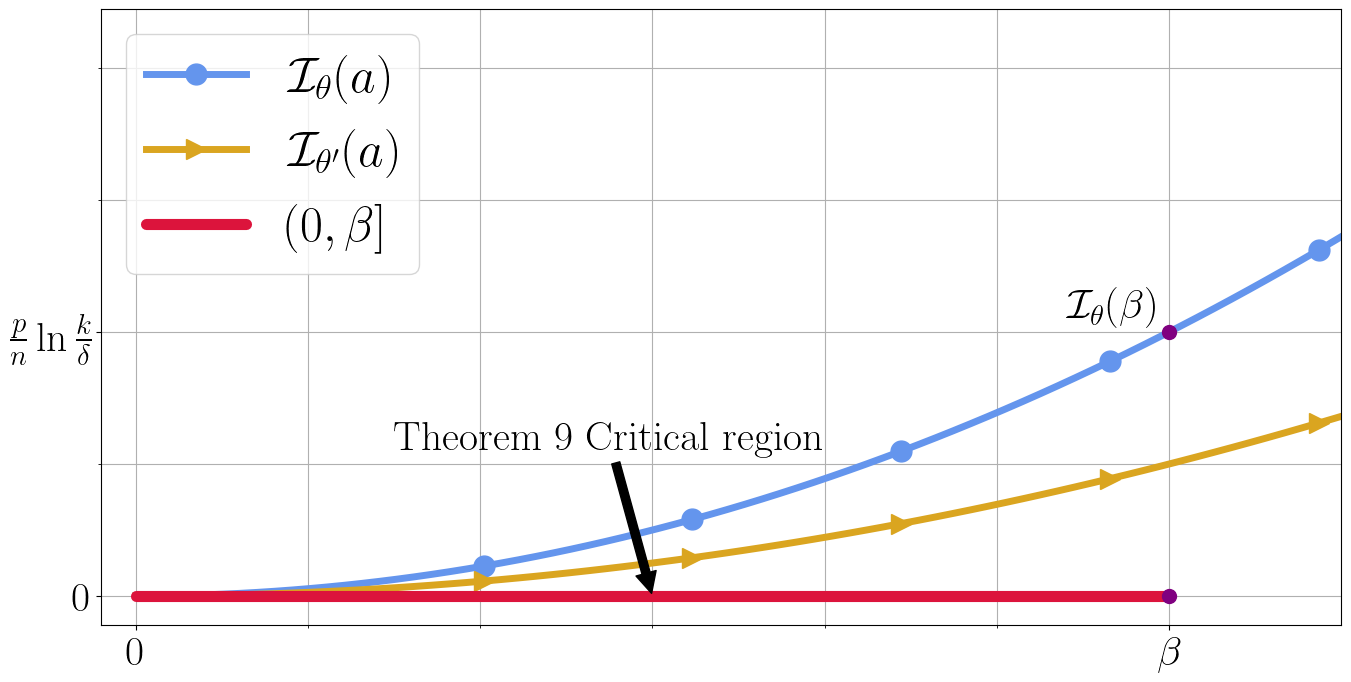

In [75]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}}(a)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(20, 12))
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}'}(a)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(20, 12))




slope = 0.6
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,lambd], [0,0], color = "crimson", linewidth = 8, zorder = 3, label = r"$(0, \beta]$", solid_capstyle='round')


plt.annotate(r"Theorem 9 Critical region", xy = (lambd/2,0) , xytext = (lambd/4, 0.05),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(lambd, 0, s=100, color = "purple", zorder = 3)
plt.text(lambd-0.03, model2(lambd) + 0.005, r"$\mathcal{I}_{\bm{\theta}}(\beta)$")

plt.scatter(lambd, model2(lambd), zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.xticks([0, 0.3], [0, r"$\beta$"])
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25], minor = True)
plt.yticks([0, model2(lambd)], [0, r"$\frac{p}{n}\ln\frac{k}{\delta}$"])
plt.yticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(loc = 2, fontsize=36)
print(xlim[1])
ax.set_xlim([-0.01, 0.35])
ax.set_ylim([-0.01, 0.2])
#plt.axis('off')
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

0.525


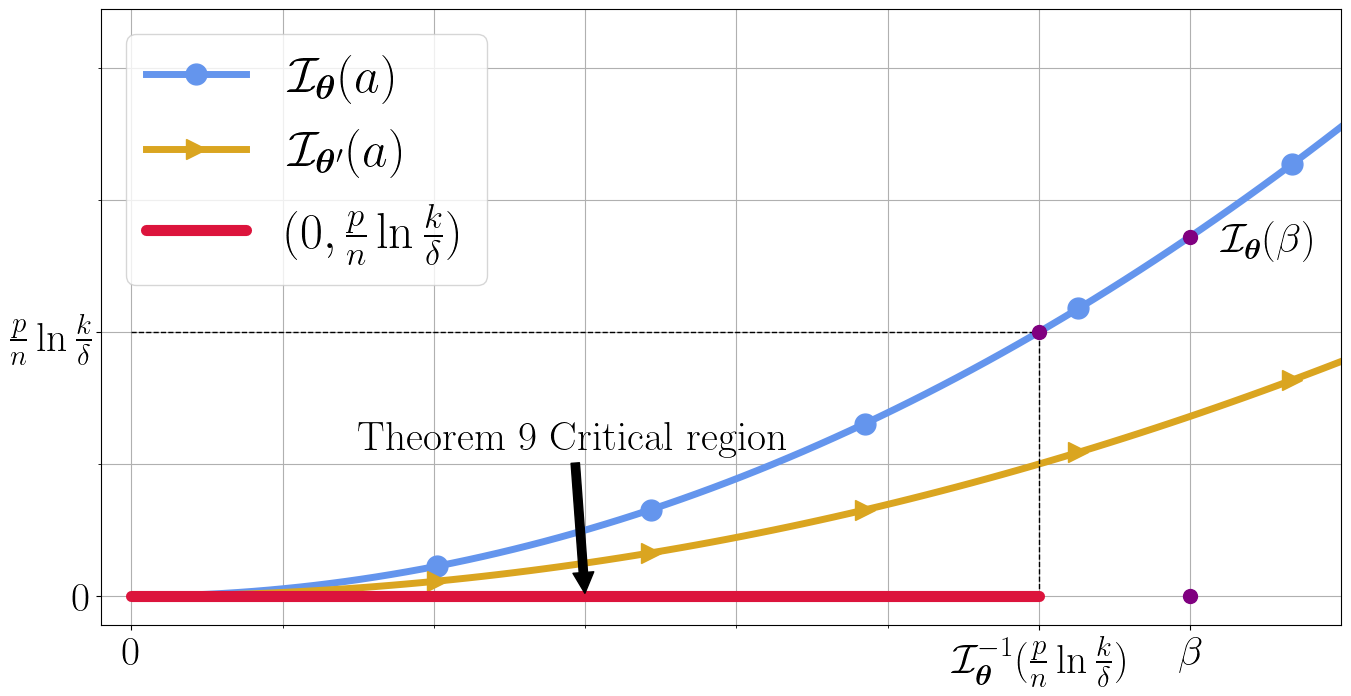

In [127]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}}(a)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(20, 14))
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}'}(a)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(20, 14))




slope = 0.6
pos = slope/2
lambd = pos
pos2 = 0.35

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,lambd], [0,0], color = "crimson", linewidth = 8, zorder = 3, label = r"$\textstyle (0, \frac{p}{n}\ln\frac{k}{\delta})$", solid_capstyle='round')
plt.plot([0,lambd], [model2(lambd),model2(lambd)], color = "black", linewidth = 1, linestyle = "dashed")
plt.plot([lambd,lambd], [0,model2(lambd)], color = "black", linewidth = 1, linestyle = "dashed")


plt.annotate(r"Theorem 9 Critical region", xy = (lambd/2,0) , xytext = (lambd/4, 0.05),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))
plt.scatter(lambd, model2(lambd), s=100, color = "purple", zorder = 3)


plt.scatter(pos2, 0, s=100, color = "purple", zorder = 3)
plt.text(pos2+0.01, model2(pos2) - 0.005, r"$\mathcal{I}_{\bm{\theta}}(\beta)$")

plt.scatter(pos2, model2(pos2), zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.xticks([0, 0.3, pos2], [0, r"$\mathcal{I}^{-1}_{\bm{\theta}}\Big(\frac{p}{n}\ln\frac{k}{\delta}\Big)$", r"$\beta$"])
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25], minor = True)
plt.yticks([0, model2(lambd)], [0, r"$\frac{p}{n}\ln\frac{k}{\delta}$"])
plt.yticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(loc = 2, fontsize=36)
print(xlim[1])
ax.set_xlim([-0.01, 0.4])
ax.set_ylim([-0.01, 0.2])
#plt.axis('off')
plt.savefig("Theorem9_1.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

In [76]:
model1_inv = lambda x: (2*x)**(1/2)
model2_inv = lambda x: x**(1/2)

0.525


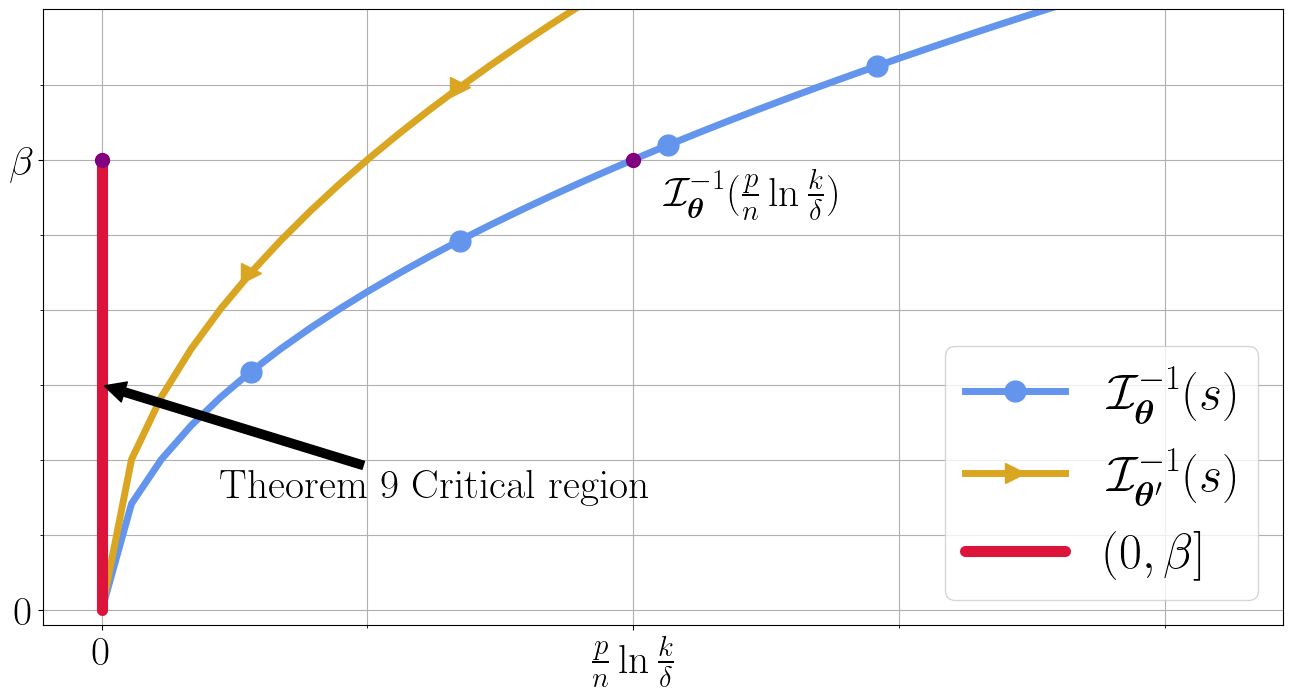

In [87]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}}(s)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(5, 7))
plt.plot(x, model1_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}'}(s)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(5, 7))




slope = 0.6
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,0], [0,lambd], color = "crimson", linewidth = 8, zorder = 3, label = r"$(0, \beta]$", solid_capstyle='round')


plt.annotate(r"Theorem 9 Critical region", xy = (0, lambd/2) , xytext = (0.02, lambd/4),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(0, lambd, s=100, color = "purple", zorder = 3)
plt.text( model2(lambd) + 0.005, lambd-0.03, r"$\mathcal{I}^{-1}_{\bm{\theta}}(\frac{p}{n}\ln\frac{k}{\delta})$")

plt.scatter(model2(lambd), lambd, zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.yticks([0, 0.3], [0, r"$\beta$"])
plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], minor = True)
plt.xticks([0, model2(lambd)], [0, r"$\frac{p}{n}\ln\frac{k}{\delta}$"])
plt.xticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(fontsize=36)
print(xlim[1])
ax.set_xlim([-0.01, 0.2])
ax.set_ylim([-0.01, 0.4])
#plt.axis('off')
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

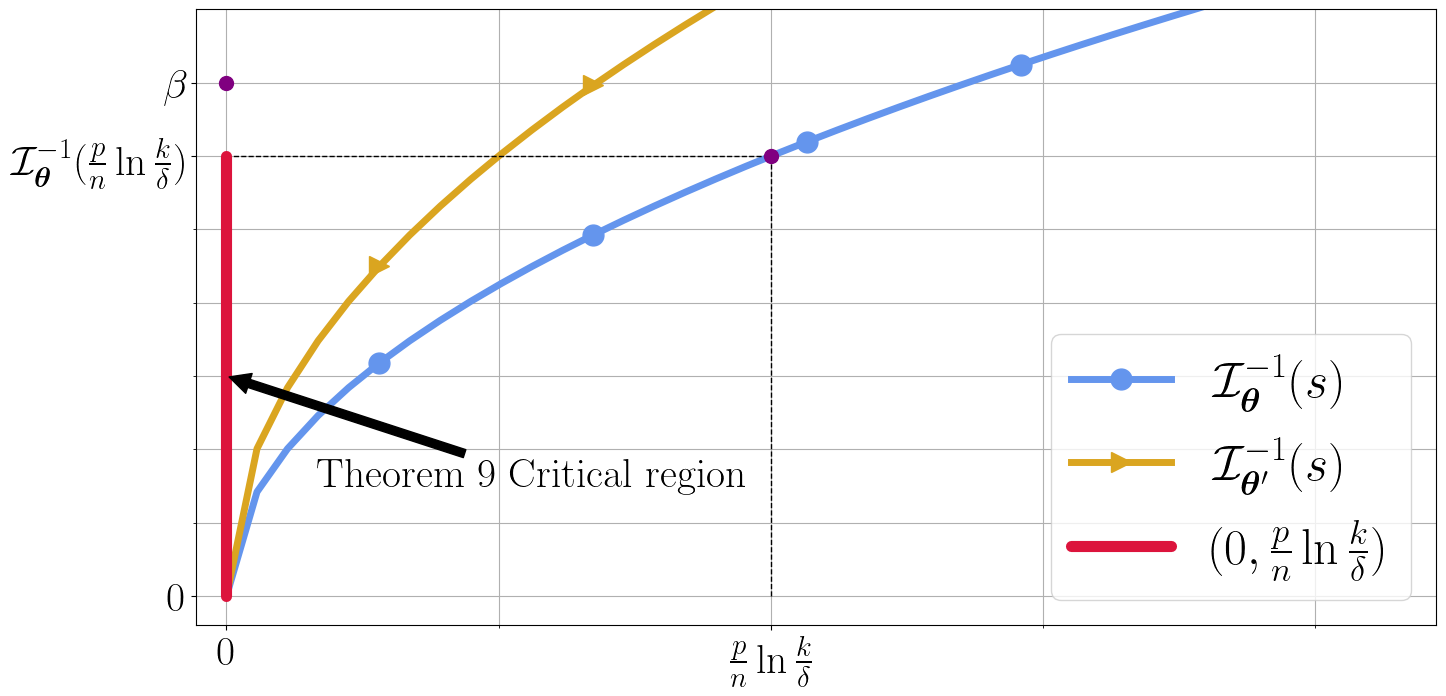

In [133]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}}(s)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(5, 7))
plt.plot(x, model1_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}'}(s)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(5, 7))




slope = 0.6
pos = slope/2
lambd = pos
pos2 = 0.35

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,0], [0,lambd],  color = "crimson", linewidth = 8, zorder = 3, label = r"$\big(0, \frac{p}{n}\ln\frac{k}{\delta}\big)$", solid_capstyle='round')
plt.plot([model2(lambd),model2(lambd)], [0,lambd],  color = "black", linewidth = 1, linestyle = "dashed")
plt.plot([0,model2(lambd)],[lambd,lambd],  color = "black", linewidth = 1, linestyle = "dashed")


plt.annotate(r"Theorem 9 Critical region", xy = (0, lambd/2) , xytext = (0.015, lambd/4),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))
plt.scatter(model2(lambd), lambd,  s=100, color = "purple", zorder = 3)


plt.scatter(0, pos2,  s=100, color = "purple", zorder = 3)

x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.yticks([0, 0.3, pos2], [0, r"$\mathcal{I}^{-1}_{\bm{\theta}}\big(\frac{p}{n}\ln\frac{k}{\delta}\big)$", r"$\beta$"])
plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25], minor = True)
plt.xticks([0, model2(lambd)], [0, r"$\frac{p}{n}\ln\frac{k}{\delta}$"])
plt.xticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(fontsize=36)
ax.set_ylim([-0.02, 0.4])
ax.set_xlim([-0.005, 0.2])
#plt.axis('off')
plt.savefig("Theorem9_2.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

0.525


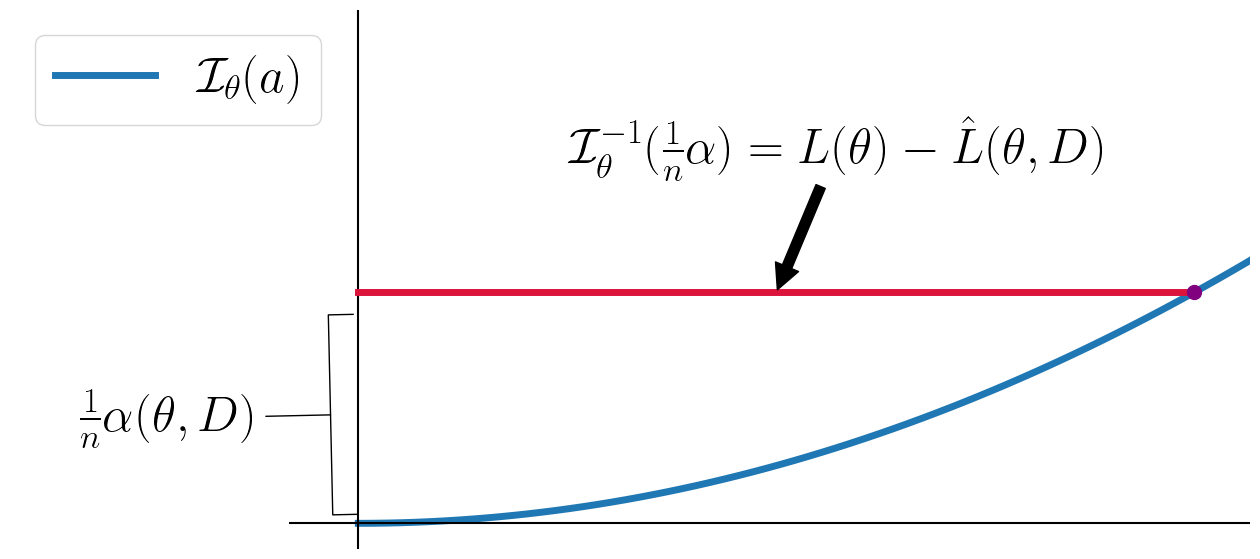

In [39]:
plt.rcParams['figure.figsize'] = (16, 7)

plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\theta}(a)$")



slope = 0.6
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.hlines(model2(lambd), 0,lambd)
plt.plot([0,lambd], [model2(lambd),model2(lambd)], color = "crimson", linewidth = 5, zorder = 3)


plt.annotate(r"${\cal I}_{\theta}^{-1}(\frac{1}{n}\alpha) = L(\theta) - \hat{L}(\theta, D)$",  fontsize = 36, xy = (lambd/2,model2(lambd)) , xytext = (lambd/4, model2(lambd)+0.05),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(lambd, model2(lambd), zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)
# plt.annotate(xy = (0, - model2(slope/2)),
#              xytext = (0.1, - model2(slope/2)),
#              text = r"$\mathcal{I}(\theta_2, 0.4)$",
#              arrowprops=dict(arrowstyle = "simple", facecolor='black', shrinkA = 20, shrinkB=20, relpos = (0.5, 0.5)))

plt.annotate(r"$\frac{1}{n}\alpha(\theta, D)$", xy = (0,  model1(slope/2)/2 + 0.02 ) , fontsize = 36, xytext = (-0.1,  model1(slope/2)/2+ 0.02 -0.0065),
            arrowprops=dict(arrowstyle='-[, widthB=02, lengthB=.5', shrinkA = 5,shrinkB = 20, lw=1.0))



ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()


plt.vlines(0, ylim[0], ylim[1], color = "black")
plt.hlines(0, xlim[0], xlim[1], color = "black")

print(xlim[1])
plt.legend(loc = "upper left",  fontsize = 36,)
ax.set_xlim([xlim[0]-0.1, 0.32])
ax.set_ylim([-0.01, 0.2])
plt.axis('off')
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')

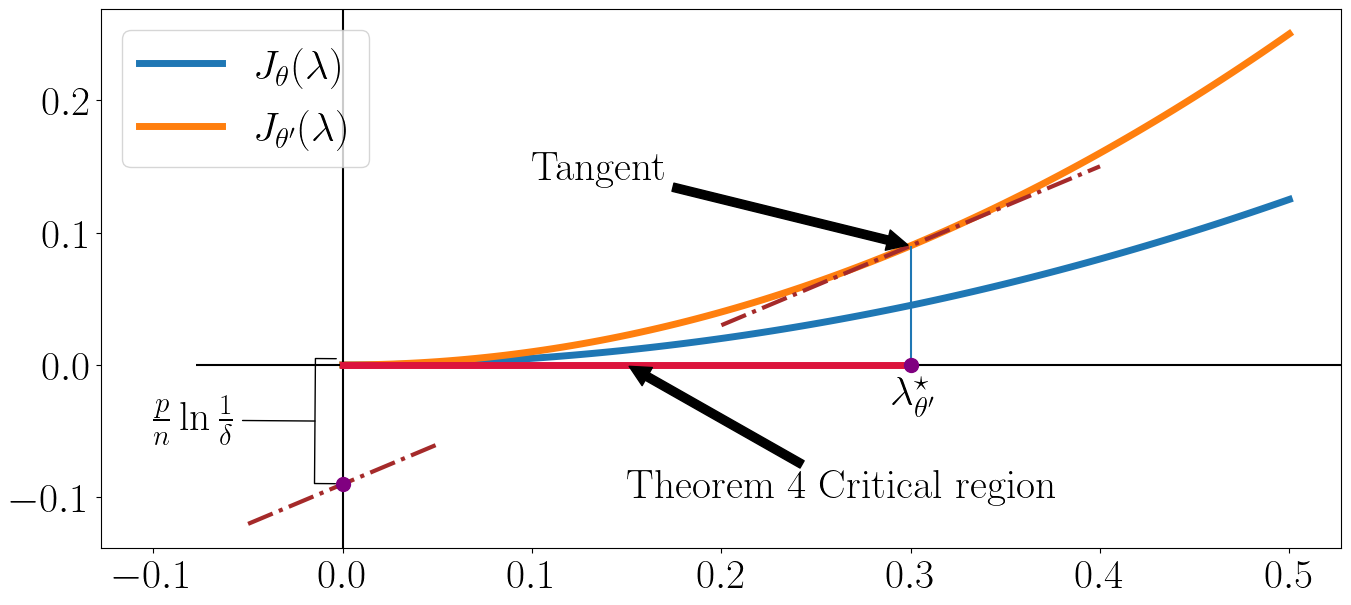

In [40]:
plt.plot(x, model1(x), linewidth = 5, label = r"$J_{\theta}(\lambda)$")
plt.plot(x, model2(x), linewidth = 5, label = r"$J_{\theta'}(\lambda)$")




slope = 0.6
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.vlines(lambd, 0, model2(lambd))
plt.annotate(xy = (lambd, model2(lambd)),
             xytext = (lambd - 0.2,  model2(lambd) + 0.05),
             text = r"Tangent",
             arrowprops=dict(arrowstyle = "simple", facecolor='black', relpos = (0.5, 0.5)))

plt.plot([0,lambd], [0,0], color = "crimson", linewidth = 5, zorder = 3)


plt.annotate(r"Theorem 4 Critical region", xy = (lambd/2,0) , xytext = (lambd/2, -0.1),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(lambd, 0, s=100, color = "purple", zorder = 3)
plt.text(lambd-0.01, -0.03, r"$\lambda_{\theta'}^\star$")
plt.plot(x_, slope * x_ - model2(slope/2), "-.", color = "brown", linewidth=3)
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)
plt.plot(x_, slope * x_ - model2(slope/2), "-.", color = "brown", linewidth=3)
plt.scatter(0, - model2(slope/2), s = 100, color = "purple", zorder = 3)
# plt.annotate(xy = (0, - model2(slope/2)),
#              xytext = (0.1, - model2(slope/2)),
#              text = r"$\mathcal{I}(\theta_2, 0.4)$",
#              arrowprops=dict(arrowstyle = "simple", facecolor='black', shrinkA = 20, shrinkB=20, relpos = (0.5, 0.5)))

plt.annotate(r"$\frac{p}{n}\ln\frac{1}{\delta}$", xy = (0, - model1(slope/2)/2 - 0.02 ) , xytext = (-0.1, - model1(slope/2)/2- 0.02 - 0.007),
            arrowprops=dict(arrowstyle='-[, widthB=01.5, lengthB=.5', shrinkA = 5,shrinkB = 20, lw=1.0))



ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()


plt.vlines(0, ylim[0], ylim[1], color = "black")
plt.hlines(0, xlim[0], xlim[1], color = "black")

plt.legend()
ax.set_xlim([xlim[0]-0.05, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
plt.savefig("plot.pdf", format = "pdf",bbox_inches='tight')

In [145]:
model1 = lambda x: (x**8)/1
model2 = lambda x: (x**10)/1.5
model3 = lambda x: (x**4)/3

In [146]:
x = np.linspace(0, 2, 100)

In [147]:
plt.clf()

<Figure size 1600x800 with 0 Axes>

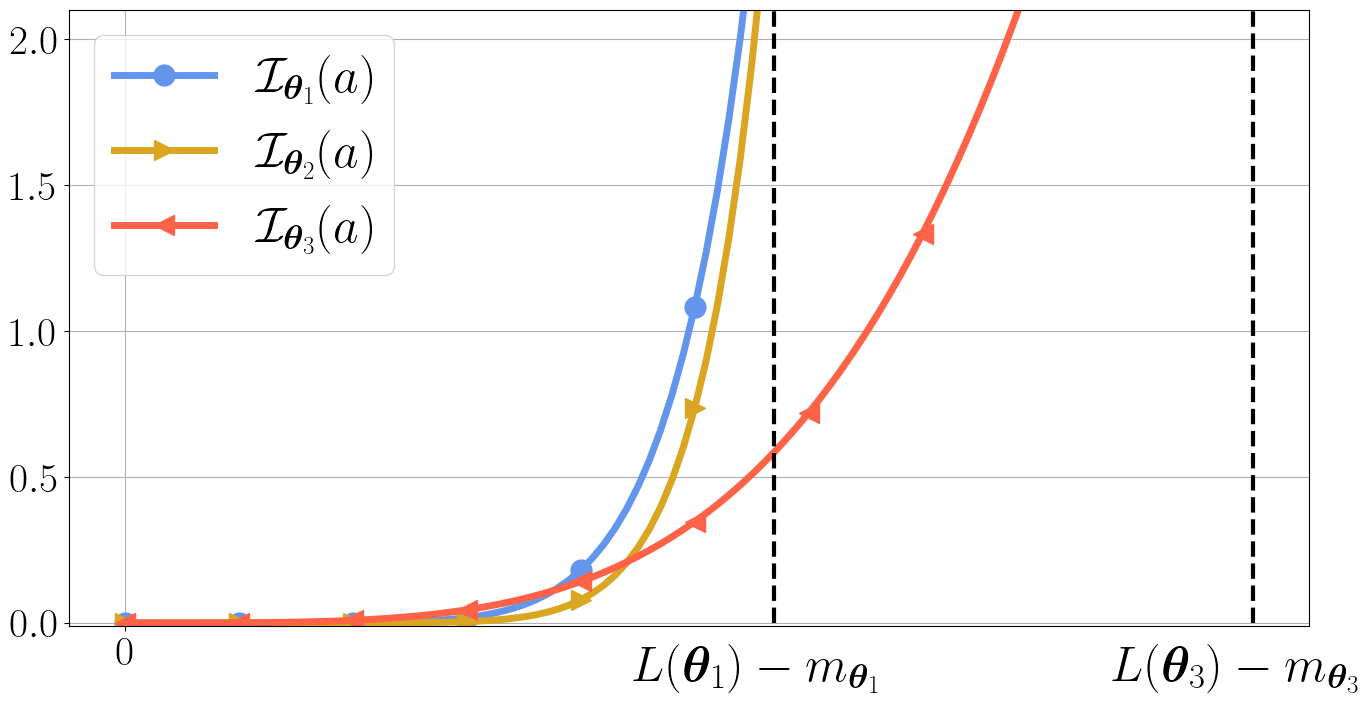

In [148]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_1}(a)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=10)
plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_2}(a)$", color = "goldenrod", marker = ">",  markersize=15, markevery=10)
plt.plot(x, model3(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_3}(a)$", color = "tomato", marker = "<",  markersize=15, markevery=10)
plt.vlines(1.15, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)
plt.vlines(2, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)

plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)

plt.annotate(r"$L(\bm{\theta}_1) - m_{\bm{\theta}_1}$", xy = (1.15, 0) , fontsize = 36, xytext = (0.9,  -0.2))

#plt.scatter(1.15, 0, color = "teal", s = 100, zorder = 3)

plt.annotate(r"$L(\bm{\theta}_3) - m_{\bm{\theta}_3}$", xy = (2, 0) , fontsize = 36, xytext = (1.75,  -0.2))

#plt.scatter(2, 0, color = "teal", s = 100, zorder = 3)

#plt.axis('off')
#plt.hlines(0, 0, 2.1, color = "black", linewidth = 5)
#plt.vlines(0, 0, 2.1, color = "black", linewidth = 5)

plt.ylim(-0.01, 2.1)
plt.xticks([0])
plt.grid(True)
plt.legend(loc = 2, fontsize=36)
plt.savefig("I_definition.pdf",format = "pdf",bbox_inches='tight')

In [149]:
model1 = lambda x: (x**(1/8))/1
model2 = lambda x: ((x*1.5)**(1/10))
model3 = lambda x: ((x*3)**(1/4))

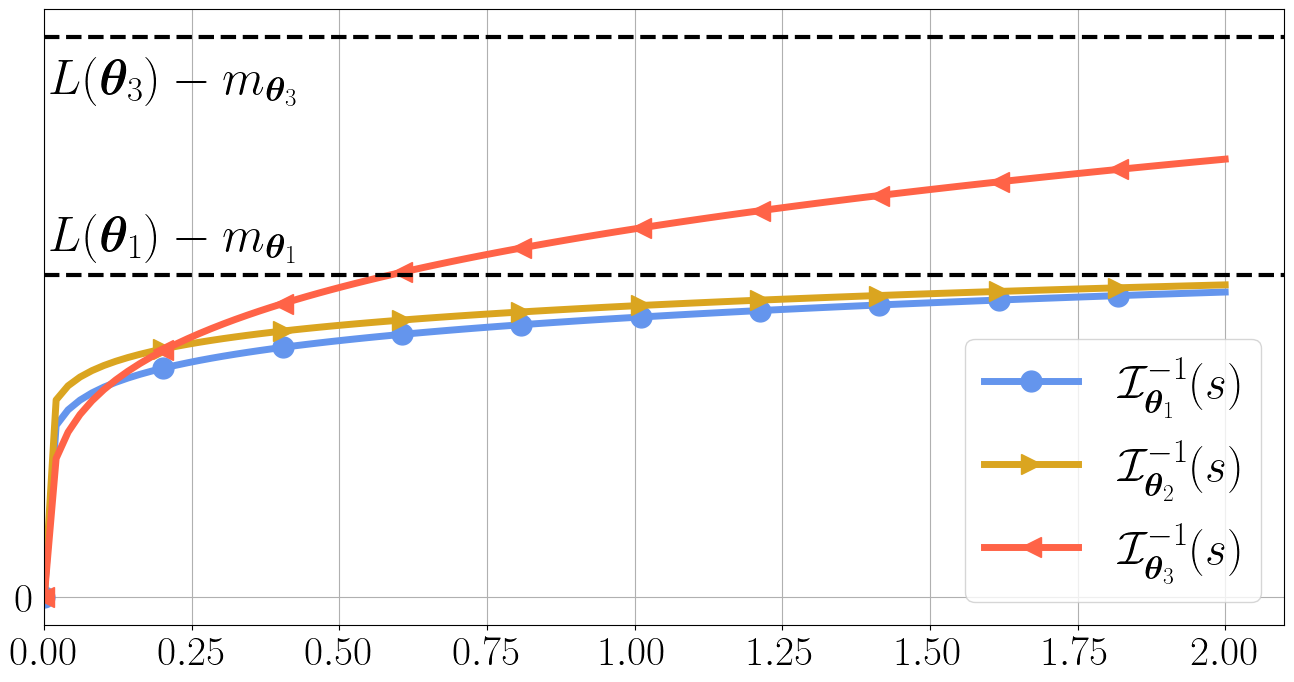

In [150]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_1}(s)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=10)
plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_2}(s)$", color = "goldenrod", marker = ">",  markersize=15, markevery=10)
plt.plot(x, model3(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_3}(s)$", color = "tomato", marker = "<",  markersize=15, markevery=10)
#plt.xlim(0, 2)
plt.hlines(1.15, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)
plt.hlines(2, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)

plt.tick_params(left = False, right = False , labelleft = True , labelbottom = True, bottom = True)


plt.annotate(r"$L(\bm{\theta}_1) - m_{\bm{\theta}_1}$", xy = (0, 1.15) , fontsize = 36, xytext = (0.01, 1.24))

#plt.scatter(0, 1.15, color = "teal", s = 100, zorder = 3)

plt.annotate(r"$L(\bm{\theta}_3) - m_{\bm{\theta}_3}$", xy = (0, 2) , fontsize = 36, xytext = (0.01, 1.80))

#plt.scatter(0, 2, color = "teal", s = 100, zorder = 3)

#plt.axis('off')
#plt.vlines(0, 0, 2.1, color = "black", linewidth = 5)
#plt.hlines(0, 0, 2.1, color = "black", linewidth = 5)

plt.xlim(-0., 2.1)
plt.yticks([0])
plt.grid()
plt.legend(loc = 4, fontsize=34)

plt.savefig("Iinv_definition.pdf",format = "pdf",bbox_inches='tight')